## This notebook is an example of L1 vs L2 loss function prepared by Rishbah Shuklah with original like (http://nbviewer.jupyter.org/github/rishy/rishy.github.io/blob/master/ipy_notebooks/L1%20vs.%20L2%20Loss.ipynb)

In [28]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tools.eval_measures import rmse
import sklearn.metrics
import matplotlib.pylab as plt
import seaborn as sns

In [29]:
# Make pylab inline and set the theme to 'ggplot'
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/hades/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
# Read Boston Housing Data
data = pd.read_csv('Housing.csv')

In [31]:
# Create a data frame with all the independent features
data_indep = data.drop('medv', axis = 1)

# Create a target vector(vector of dependent variable, i.e. 'medv')
data_dep = data['medv']

# Split data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(data_indep, data_dep,
                                                    test_size = 0.20,
                                                    random_state = 42)

### Regression without any Outliers:

In [32]:
# Now let's fit a GradientBoostingRegressor with a L1(Least Absolute Deviation) loss function
# Set a random seed so that we can reproduce the results
np.random.seed(32767)

# A GradientBoostingRegressor with L1(Least Absolute Deviation) as the loss function
mod = GradientBoostingRegressor(loss='lad')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
rmse_l1_no_outliers = rmse(predict, test_y)
r2_l1_no_outliers = sklearn.metrics.r2_score(predict, test_y)

In [33]:
# Suppress printing numpy array in scientific notation
np.set_printoptions(suppress=True)

error = predict - test_y

# Print squared errors in all test samples 
squared_errors = np.around(error ** 2, decimals = 2)

RMSE-L1 (no outliers) : 3.372770459305072
R2-L1 (no outliers) : 0.7943060650828734


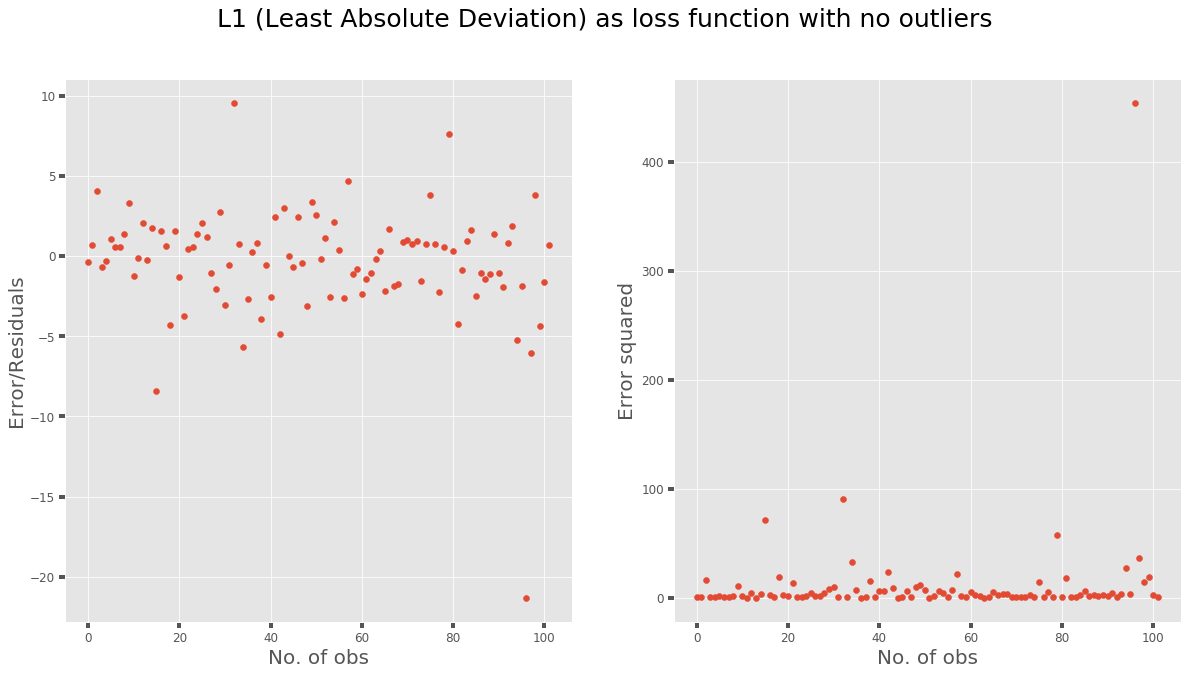

In [34]:
print("RMSE-L1 (no outliers) : {0}".format(rmse_l1_no_outliers))
print("R2-L1 (no outliers) : {0}".format(r2_l1_no_outliers))
fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].set_xlabel("No. of obs", fontsize=20)
ax[0].set_ylabel("Error/Residuals", fontsize=20)
ax[0].tick_params(direction='out', length=6, width=4,  labelsize=12)
ax[0].scatter(x=np.arange(0,len(test_y),1), y=error)

ax[1].set_xlabel("No. of obs", fontsize=20)
ax[1].set_ylabel("Error squared",fontsize=20)
ax[1].tick_params(direction='out', length=6, width=4,  labelsize=12)
ax[1].scatter(x=np.arange(0,len(test_y),1), y=squared_errors)
plt.suptitle("L1 (Least Absolute Deviation) as loss function with no outliers", fontsize= 25)

plt.show()

In [35]:
# A GradientBoostingRegressor with L2(Least Squares) as the loss function
mod = GradientBoostingRegressor(loss='ls')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
rmse_l2_no_outliers = rmse(predict, test_y)
r2_l2_no_outliers = sklearn.metrics.r2_score(predict, test_y)

In [36]:
error = predict - test_y

# Print squared errors in all test samples 
squared_errors = np.around(error ** 2, decimals = 2)

RMSE-L2 (no outliers): 2.5021576231410676
R2-L2 (no outliers) : 0.893935100082636


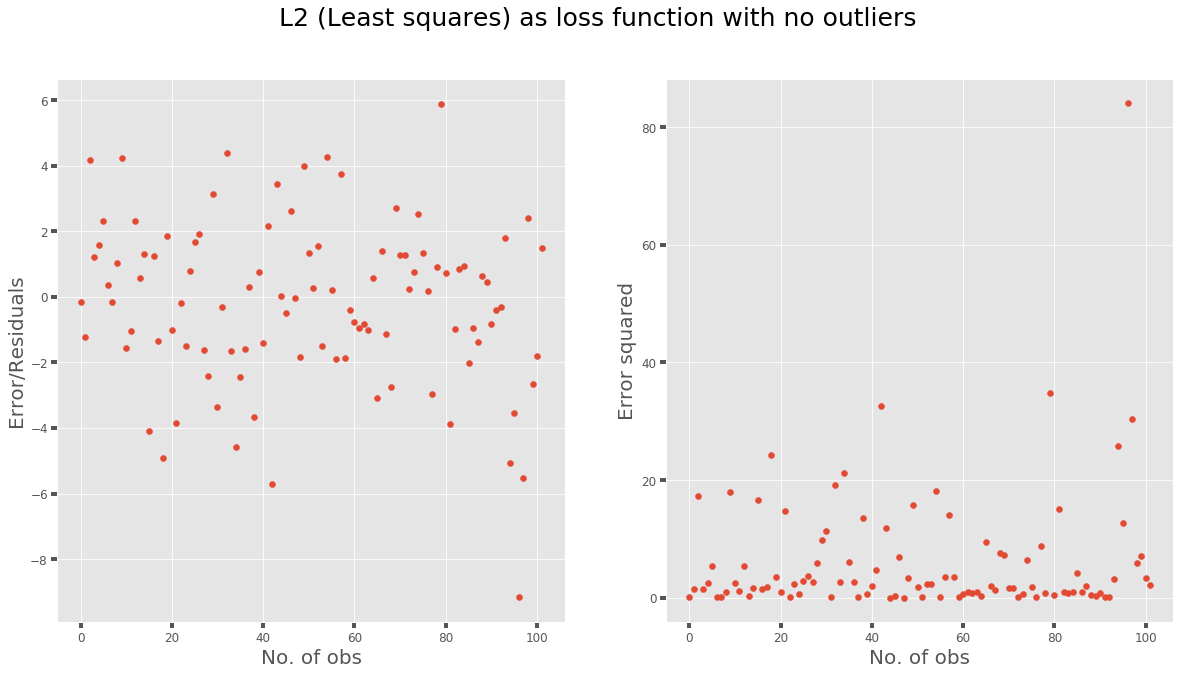

In [37]:
print("RMSE-L2 (no outliers): {0}".format(rmse_l2_no_outliers))
print("R2-L2 (no outliers) : {0}".format(r2_l2_no_outliers))
fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].set_xlabel("No. of obs", fontsize=20)
ax[0].set_ylabel("Error/Residuals", fontsize=20)
ax[0].tick_params(direction='out', length=6, width=4,  labelsize=12)
ax[0].scatter(x=np.arange(0,len(test_y),1), y=error)

ax[1].set_xlabel("No. of obs", fontsize=20)
ax[1].set_ylabel("Error squared",fontsize=20)
ax[1].tick_params(direction='out', length=6, width=4,  labelsize=12)
ax[1].scatter(x=np.arange(0,len(test_y),1), y=squared_errors)
plt.suptitle("L2 (Least squares) as loss function with no outliers", fontsize= 25)

plt.show()

As apparent from RMSE errors of L1 and L2 loss functions, Least Squares(L2) outperform L1, when there are no outliers in the data.

### Regression with Outliers:

In [38]:
# Some statistics about the Housing Data
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


After looking at the minimum and maximum values of 'medv' column, we can see that the range of values in 'medv' is [5, 50].<br/>
Let's add a few Outliers in this Dataset, so that we can see some significant differences with <b>L1</b> and <b>L2</b> loss functions.

In [39]:
# Get upper and lower bounds[min, max] of all the features
stats = data.describe()
extremes = stats.loc[['min', 'max'],:].drop('medv', axis = 1)
extremes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97


Now, we are going to generate 5 random samples, such that their values lies in the [min, max] range of respective features.

In [40]:
# Set a random seed
np.random.seed(1234)

# Create 5 random values 
rands = np.random.rand(5, 1)
rands

array([[ 0.19151945],
       [ 0.62210877],
       [ 0.43772774],
       [ 0.78535858],
       [ 0.77997581]])

In [41]:
# Get the 'min' and 'max' rows as numpy array
min_array = np.array(extremes.loc[['min'], :])
max_array = np.array(extremes.loc[['max'], :])

# Find the difference(range) of 'max' and 'min'
range = max_array - min_array
range

array([[  88.96988,  100.     ,   27.28   ,    1.     ,    0.486  ,
           5.219  ,   97.1    ,   10.9969 ,   23.     ,  524.     ,
           9.4    ,  396.58   ,   36.24   ]])

In [42]:
# Generate 5 samples with 'rands' value
outliers_X = (rands * range) + min_array
outliers_X

array([[  17.04578252,   19.15194504,    5.68465061,    0.19151945,
           0.47807845,    4.56054001,   21.49653863,    3.23572024,
           5.40494736,  287.356192  ,   14.40028283,   76.27278363,
           8.67066488],
       [  55.35526271,   62.2108771 ,   17.43112727,    0.62210877,
           0.68734486,    6.80778568,   63.30676167,    7.97086794,
          15.30850173,  512.98499602,   18.44782245,  247.03589642,
          24.27522186],
       [  38.95090441,   43.7727739 ,   12.40121272,    0.43772774,
           0.59773568,    5.84550107,   45.40336346,    5.94324817,
          11.067738  ,  416.36933524,   16.71464075,  173.91406674,
          17.59325326],
       [  69.87957895,   78.53585837,   21.88458216,    0.78535858,
           0.76668427,    7.65978645,   79.15831848,    9.76610981,
          19.06324743,  598.52789787,   19.98237069,  311.77750713,
          30.19139507],
       [  69.40067405,   77.99758081,   21.73774005,    0.77997581,
           0.7640682

In [43]:
# We will also create some hard coded outliers for 'medv', i.e. our target
medv_outliers = np.array([0, 0, 600, 700, 600])

In [44]:
# Let's have a look at the data types of all the columns
# so that we can create our new Dataset compatible with the original one
data_indep.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
dtype: object

In [45]:
# Change the type of 'chas', 'rad' and 'tax' to rounded of Integers
outliers_X[:, [3, 8, 9]] = np.int64(np.round(outliers_X[:, [3, 8, 9]]))

In [46]:
# Finally concatenate our existing 'train_X' and 'train_y' with these outliers
train_X = np.append(train_X, outliers_X, axis = 0)
train_y = np.append(train_y, medv_outliers, axis = 0)

Text(0,0.5,'count')

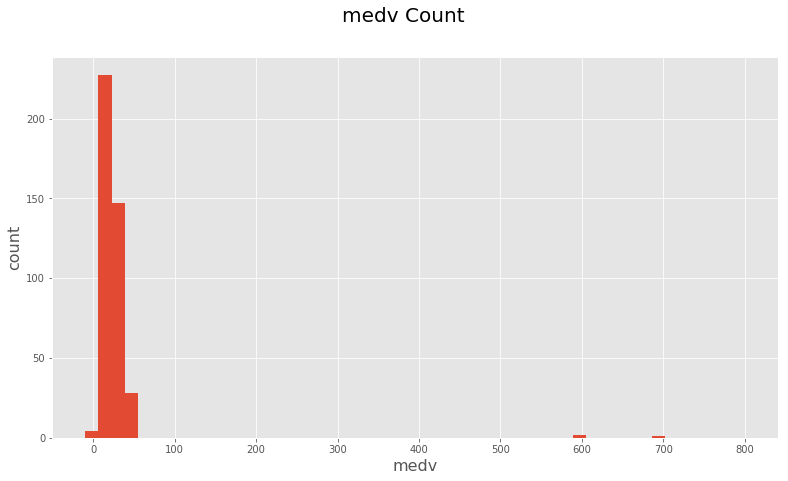

In [47]:
# Plot a histogram of 'medv' in train_y
fig = plt.figure(figsize=(13,7))
plt.hist(train_y, bins=50, range = (-10, 800))
fig.suptitle('medv Count', fontsize = 20)
plt.xlabel('medv', fontsize = 16)
plt.ylabel('count', fontsize = 16)

You can see there are some clear outliers at 600, 700 and even one or two 'medv' values are 0.<br/>
Since, our outliers are in place now, we will once again fit the GradientBoostingRegressor with L1 and L2 Loss function to see the contrast in their performances with outliers.

In [48]:
# So let's fit a GradientBoostingRegressor with a L1(Least Absolute Deviation) loss function
np.random.seed(9876)

# A GradientBoostingRegressor with L1(Least Absolute Deviation) as the loss function
mod = GradientBoostingRegressor(loss='lad')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
rmse_l1_with_outliers = rmse(predict, test_y)
r2_l1_with_outliers = sklearn.metrics.r2_score(predict, test_y)

In [49]:
error = predict - test_y

# Print squared errors in all test samples 
squared_errors = np.around(error ** 2, decimals = 2)


RMSE-L1 (with outliers) : 3.6591252167898443
R2-L1 (with outliers) : 0.7640171899065875


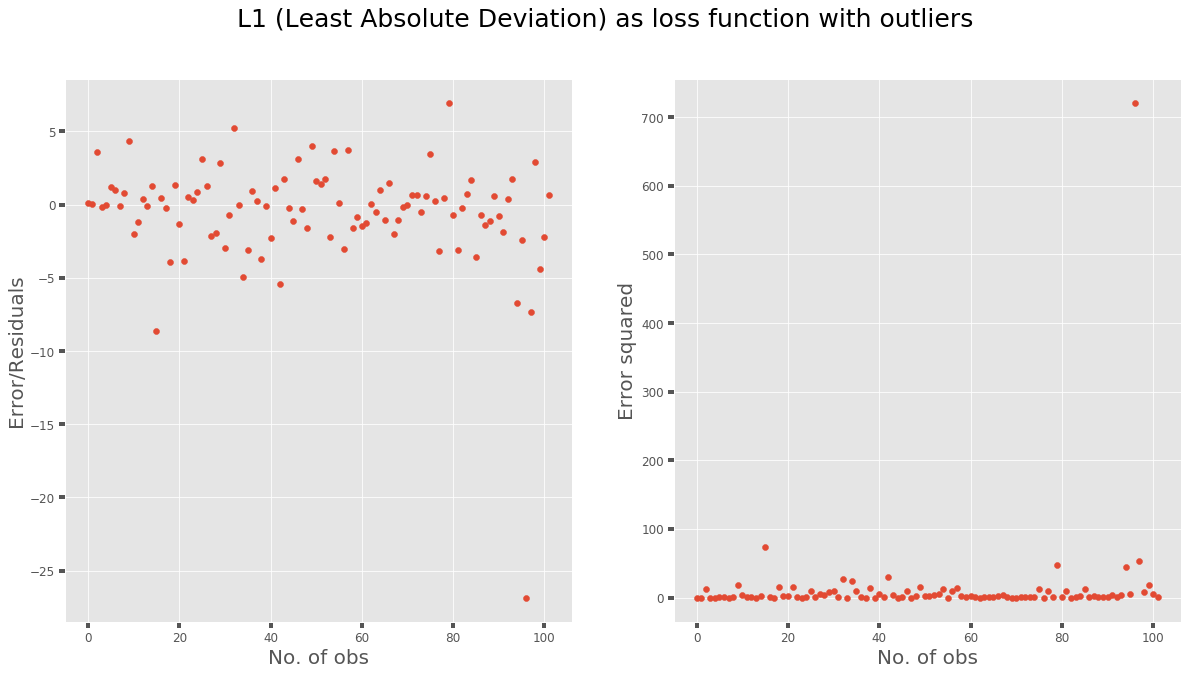

In [50]:
print("RMSE-L1 (with outliers) : {0}".format(rmse_l1_with_outliers))
print("R2-L1 (with outliers) : {0}".format(r2_l1_with_outliers))
fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].set_xlabel("No. of obs", fontsize=20)
ax[0].set_ylabel("Error/Residuals", fontsize=20)
ax[0].tick_params(direction='out', length=6, width=4,  labelsize=12)
ax[0].scatter(x=np.arange(0,len(test_y),1), y=error)

ax[1].set_xlabel("No. of obs", fontsize=20)
ax[1].set_ylabel("Error squared",fontsize=20)
ax[1].tick_params(direction='out', length=6, width=4,  labelsize=12)
ax[1].scatter(x=np.arange(0,len(test_y),1), y=squared_errors)
plt.suptitle("L1 (Least Absolute Deviation) as loss function with outliers", fontsize= 25)

plt.show()

In [51]:
# A GradientBoostingRegressor with L2(Least Squares) as the loss function
mod = GradientBoostingRegressor(loss='ls')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
rmse_l2_with_outiers = rmse(predict, test_y)
r2_l2_with_outliers = sklearn.metrics.r2_score(predict, test_y)

In [52]:
error = predict - test_y

# Print squared errors in all test samples 
squared_errors = np.around(error ** 2, decimals = 2)

RMSE-L2 (outliers): 9.789101174552282
R2-L2 (with outliers) : 0.1568998635442621


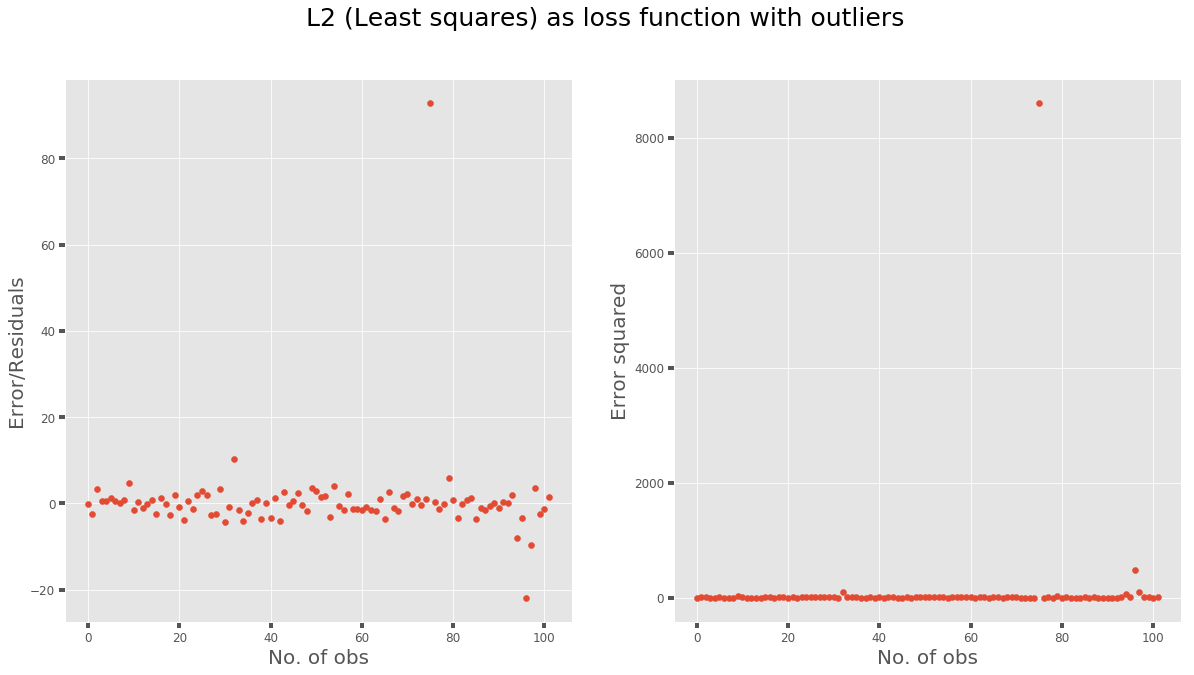

In [53]:
print("RMSE-L2 (outliers): {0}".format(rmse_l2_with_outiers))
print("R2-L2 (with outliers) : {0}".format(r2_l2_with_outliers))
fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].set_xlabel("No. of obs", fontsize=20)
ax[0].set_ylabel("Error/Residuals", fontsize=20)
ax[0].tick_params(direction='out', length=6, width=4,  labelsize=12)
ax[0].scatter(x=np.arange(0,len(test_y),1), y=error)

ax[1].set_xlabel("No. of obs", fontsize=20)
ax[1].set_ylabel("Error squared",fontsize=20)
ax[1].tick_params(direction='out', length=6, width=4,  labelsize=12)
ax[1].scatter(x=np.arange(0,len(test_y),1), y=squared_errors)
plt.suptitle("L2 (Least squares) as loss function with outliers", fontsize= 25)

plt.show()

In [54]:
pd.DataFrame({"L1 (Least Absolute Deviation)":[rmse_l1_no_outliers,rmse_l1_with_outliers], "L2 (Least Squares)":[rmse_l2_no_outliers, rmse_l2_with_outiers]}, 
            index=["Without Outliers","With Outliers"])

,L1 (Least Absolute Deviation),L2 (Least Squares)
Without Outliers,3.372770,2.502158
With Outliers,3.659125,9.789101


With outliers in the dataset, a L2(Loss function) tries to adjust the coefficients features according to these outliers on the expense of other features, since the squared-error is going to be huge for these outliers(for error > 1). On the other hand L1(Least absolute deviation) is quite robust to outliers.<br/>
As a result, L2 loss function may result in huge deviations in some of the samples which results in reduced accuracy.